# Исследование надежности заемщиков <a id='intro'></a>


По заданию кредитного отдела банка необходимо определить, какие факторы оказывают влияют на своевременное закрытие кредита. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


**Цель исследования** - ответить на вопросы:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок? 


**Ход исследования** 

Входные данные от банка — статистика о платёжеспособности клиентов, размещены по адресу `/datasets/data.csv`.
Перед проверкой гипотез понадобится обзор данных.   
Проверим данные на ошибки и оценим их влияние на исследование. На этапе предобработки постараемся исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.


### Шаг 1. Обзор данных  <a id='step_1'></a>

Для первого знакомства с данными импортируем библиотеку  `pandas` и сохраним предоставленный файл в переменной `df`.

In [1]:
import pandas as pd # импорт библиотеки pandas

In [2]:
df = pd.read_csv('/datasets/data.csv') # чтение файла с данными и сохранение в df
df.head(10) # получение первых 10 строк таблицы df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Получим общую информацию о таблице методом `info()`.

In [3]:
df.info()  # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице 21525 строк, 12 столбцов. Встречаются разные типы данных: `float64`,`int64`,`object`.  

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Согласно документации к данным:
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

 ### Шаг 2.1 Заполнение пропусков  <a id='step_2.1'></a>

Посчитаем сколько в таблице пропущенных значений. Для этого воспользуемся методами `isna()` и `sum()`.

In [4]:
(df.isna().mean()*100).round(1) # подсчёт пропусков

children             0.0
days_employed       10.1
dob_years            0.0
education            0.0
education_id         0.0
family_status        0.0
family_status_id     0.0
gender               0.0
income_type          0.0
debt                 0.0
total_income        10.1
purpose              0.0
dtype: float64

Пропущено одинаковое количество значений в ячейках `'days_employed'`и `'total_income'` - 2174. Доля пропущенных значений составляет 10% датафрейма.

Ознакомимся со строками, содержащими пропусками, используя методы `isna()` и `head()`.

In [5]:
(df[df['days_employed'].isna()].head()) # получение первых 10 строк, содержащих пропуски

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Пропуски встречаются в категории `"пенсионеры"`, `"госслужащие"`. Можно предположить, что в строки с пропусками попадают  неработающие пенсионеры, которые не имеют дохода кроме пенсии, и выдача кредита производится без подтверждения дохода и трудового стажа.
 Также возможно, не требуется подтверждение дохода при выдаче небольших сумм кредита.

10% таблицы - большое значение. Удаление этих строк может исказить результаты исследования. Данные, необходимые для проверки трех гипотех из четырех, в строках с пропусками есть: заполнена информация о целях кредита, семейном положении и количестве детей.   

Пропуски в количественных переменных заполняют характерными
значениями. Это значения, характеризующие состояние выборки. Рассчитаем медиану для столбцов `'days_employed'`и `'total_income'` методом `median()`, и сохраним результаты в переменные `days_employed_avg` и `total_income_avg`.

In [6]:
days_employed_avg = df['days_employed'].median() # расчет медианы для столбца 'days_employed' 
                                                 # и сохранение результата в переменную days_employed_avg
days_employed_avg # вывод значения переменной на экран

-1203.369528770489

Значение медианы получилось отрицательным. Это связано с ошибками в данных. В столбце встречаются отрицательные значения стажа. Заменим пропуски медианным значением в столбце `'days_employed'` после устранения ошибок в [шаге 2.2](#step_2.2_days_employed)

In [7]:
total_income_avg = df['total_income'].median() # расчет медианы для столбца 'total_income'
                                               # и сохранение результата в переменную total_income_avg
total_income_avg # вывод значения переменной на экран

145017.93753253992

Медианное значение ежемесячного дохода заемщиков в выборке составило 145017,94, заменим этим значением пропуски в столбце `'total_income'`, используя метод `fillna()`.

In [8]:
df['total_income'] = df['total_income'].fillna(total_income_avg) # замена пропусков в столбце 'total_income' 
                                                                 # на медианное значение
df.isna().sum() # подсчёт пропусков после замены

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

В столбце `'total_income'` не осталось пропущенных значений.

### Шаг 2.2 Проверка данных на аномалии и исправления.  <a id='step_2.2'></a>

#### Проверка данных в столбце 'children'  <a id='step_2.2_children'></a>

Используя метод `value_counts()` ознакомимся с уникальными значениями в столбце `'children'`.

In [9]:
df['children'].value_counts() #просмотр уникальных значений в столбце 'children'

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Строки, в которых указано количество детей -1 и 20 похоже содержат ошибку. Вероятнее всего, причина таких ошибок - человеческий фактор. Предполагаем, что значение `-1` - это 1 ребенок, а `20` - 2 ребенка. Удельный вес строк с ошибочными значениями в графе `'children'` не велик (менее 1%).

Тем не менее, чтобы не терять строки с данными, изменим значения `-1` в столбце `'children'` на `1`, для этого используем цикл, который отберет значения в столбце равные `-1` и применит к ним метод  `abs()`. После чего, для проверки выведем на экран список уникальных значений столбца `'children'`.

In [10]:
for value in df['children']: # цикл, отбирающий значения -1 в столбце 'children' 
    if value == -1:
        df['children'] = df['children'].abs() # функции abs() возвращает абсолютные значения
        
df['children'].unique() # вывод уникальных значений в столбце 'children'

array([ 1,  0,  3,  2,  4, 20,  5])

Благодаря методу `unique()` убедились, что в столбце не осталось отрицательных значений.

Теперь заменим значение `20` в столбце `'children'` на `2` используя функцию `replace()`. А затем проверим работу фунции просмотрев уникальные значения в столбце. 

In [11]:
df['children'] = df['children'].replace(20, 2) # замена значения '20' в столбце 'children' на '2' с помощью функции replace()
  
df['children'].value_counts() # вывод уникальных значений в столбце 'children'

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

В столбце `'children'` не осталось аномальных значений.

#### Проверка данных в столбце 'days_employed'  <a id='step_2.2_days_employed'></a>

C помощью гистрограммы рассмотрим уникульные значения для столбца `'days_employed'`.

<Axes: >

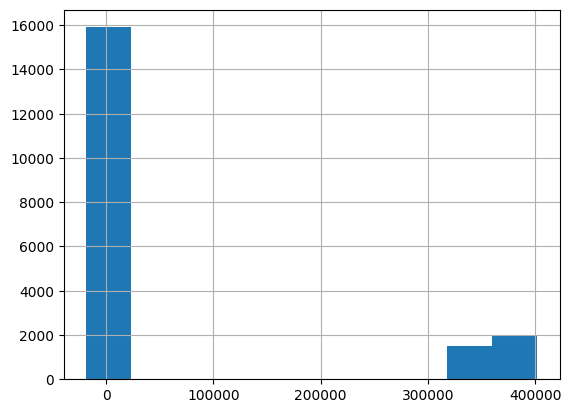

In [12]:
df['days_employed'].hist() # построение гистограммы для столбца 'days_employed'

Гистограмма показала две проблемы в данном столбце:
- **отрицательные значения;**
- **группа аномальных значений, в которых стаж составляет свыше 300000 дней, или 865 лет**.

Но кроме этого, из шага [2.1](#step_2.1) мы помним, что у нас осталась еще одна проблема в столбце `'days_employed'`  - **пропуски в данных**.

Трудовой стаж не может быть исчислен в отрицательных величинах. Предположим, что ошибка только в минусе перед значением стажа, в остальном значения занесены корректно. Эта ошибка может быть вызвана человеческим фактором, при ручном вводе данных. В этом случае нам необходимо отрицательные значения стажа сделать положительными.  

С помощью цикла и функции `abs()` заменим отрицательные значения в столбце `'days_employed'` на их абсолютные значения. 

In [13]:
 df['days_employed'] = df['days_employed'].abs()  # применение функции abs() 

Для проверки выведем на экран последние строки таблицы методом `tail()`.

In [14]:
df.tail() # получение последних строк df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


Построив гистограмму, убедимся, что в столбце не осталось отрицательных значений.

<Axes: >

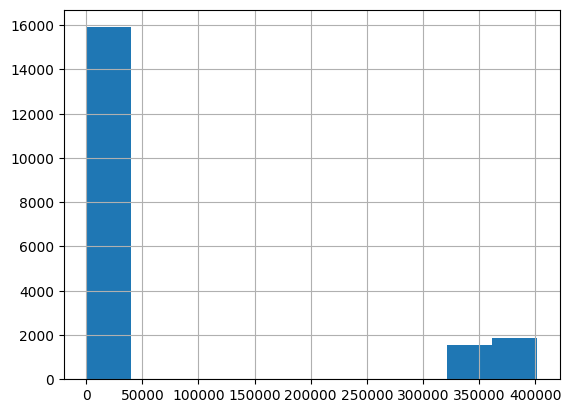

In [15]:
df['days_employed'].hist() # построение гистограммы столбца 'days_employed'

Метод сработал верно. Теперь, когда в столбце не осталось отрицательных значений, рассчитаем медиану и заменим ею пропуски в данном столбце. 

In [16]:
days_employed_avg = df['days_employed'].median() # расчет медианы для столбца 'days_employed' после исправления ошибок
                                                 # в данных, и сохранение результата в переменную days_employed_avg
days_employed_avg # вывод значения переменной на экран 

2194.220566878695

На этот раз медиана составила 2194,0, что соответсвтует 6 годам трудового стажа. Используя метод `fillna()` передадим это значение вместо пропусков `NaN`.

In [17]:
df['days_employed'] = df['days_employed'].fillna(days_employed_avg) # замена пропусков медианным значением
df.isna().sum() # подсчет пропусков 

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Сочетание методов `isna()`и `sum()` помогает убедиться, что пропуски в таблице отработаны полностью.

Теперь перейдем к аномально большим значениям стажа. Отфильтруем таблицу по столбцу `'days_employed'` и рассмотрим строки, в которых стаж составляет более 300000 дней.

In [18]:
df[df['days_employed'] > 300000].head() # получение первых строк с аномальными значениями 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью


Аномальные значения в графе `'days_employed'` пренадлежат пенсионерам.  

Можем предположить, что данные по стажу в этих строках записаны не в днях, а в часах. Так как информация о стаже не влияет на результаты исследования, можем заменить ошибочные значения рассчитанной ранее медианой. Для замены спользуем собственную функцию `day_empl_avg`, которая вернет медианное значение для строк со стажем больше 300000 дней.

In [19]:
def day_empl_avg(day): # функция для замены аномальных значений медианными
    if day > 300000:
        return days_employed_avg
    return day

Применим функцию к столбцу `'days_employed'`.

In [20]:
df['days_employed'] = df['days_employed'].apply(day_empl_avg) # применение функции days_employed

Построим гистрограмму и убедимся, что функция сработала верно.

<Axes: >

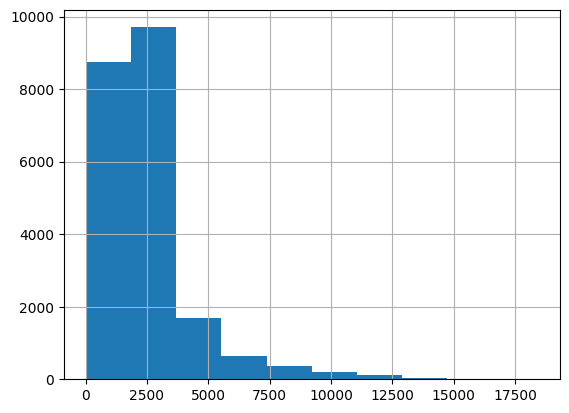

In [21]:
df['days_employed'].hist() # построение гистограммы для столбца 'days_employed'

Самое большое значение стажа на шкале гистограммы - 17500 дней, в столбце не осталось аномальных значений.

#### Проверка данных в столбце 'dob_years'  <a id='step_2.2_dob_years'></a>

Выберем уникальные значения столбца `'dob_years'` используя метод `unique()` и отсортируем их в порядуе возрастания с помощью `sort_values()`.

In [22]:
 df['dob_years'].sort_values().unique() # проверка уникальных значений в столбце 'dob_years'

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

В таблице у некоторых клиентов указан возраст 0 лет. 

Выведем на экран строки с ошибкой.

In [23]:
df[df['dob_years']<18] # просмотр строк в которых вместо возраста клиента указан 0

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,2194.220567,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,2194.220567,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,2194.220567,0,среднее,1,женат / замужем,0,F,сотрудник,0,145017.937533,жилье
20462,0,2194.220567,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья
20577,0,2194.220567,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость
21179,2,108.967042,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости


В 101 строке вместо возраста клиента указан 0. Чтобы не терять эти строки, заменим ошибочные значения медианой.

Методом `median()` рассчитаем медиану для столбца `'dob_years'` и сохраним ее значение в переменную `dob_years_avg`. Для замены используем собственную функцию `dob_year_avg`.

In [24]:
dob_years_avg = df['dob_years'].median() # расчет медианы столбца 'dob_years' и сохранение ее в переменную dob_years_avg
dob_years_avg # вывод значения переменной dob_years_avg на экран

42.0

In [25]:
def dob_year_avg(age): # функция для замены аномальных значений медианными. 
    if age < 18:
        return dob_years_avg
    return age

Применим функцию `dob_year_avg` к столбцу `'dob_years'`.

In [26]:
df['dob_years'] = df['dob_years'].apply(dob_year_avg) # применение функции к столбцу 'dob_years' методом apply()

Для проверки выведем уникальные значения столбца `'dob_years'`.

In [27]:
df['dob_years'].sort_values().unique() # просмотр уникальных значений в столбце 'dob_years' и сортировка их по возрастанию

array([19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31.,
       32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
       45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72., 73., 74., 75.])

В столбце `'dob_years'` не осталось нетипичных значений.

<Axes: >

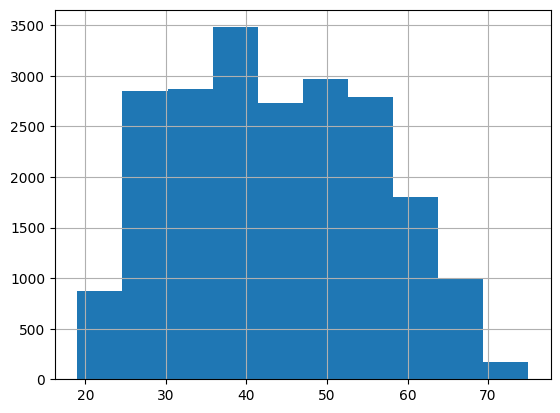

In [28]:
df['dob_years'].hist() # построение гистограммы

#### Проверка данных в столбце 'education' <a id='step_2.2_education'></a>

Ознакомимся с уникальными значениями столбца `'education'` при помощи метода `value_counts()`.

In [29]:
df['education'].value_counts() # просмотр уникальных значений в столбце 'education' 

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

В данном столбце присутствуют дубликаты - одни и те же значения записанны разным регистром. Подобные ошибки возникают когда данные вносятся вручную, а не выбираются из предлагаемого списка значений. Создание справочника с выбором категории образования помогло бы улучшить качество данных.

Чтобы привести все значения к одноу регистру и избавиться от дубликатов, воспользуемся методом `str.lower()`.

In [30]:
df['education'] = df['education'].str.lower() # перевод значений в столбце в нижний регистр методом str.lower()

In [31]:
df['education'].value_counts() # проверка уникальных значений

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

В результате мы получили пять категорий образования и никаких дубликатов.

#### Проверка данных в столбце 'education_id' <a id='step_2.2_education_id'></a>

Просмотрим значения в столбце  `'education_id'`. 

In [32]:
df['education_id'].value_counts()  # проверка уникальных значений

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

Пять значений id, что соответствует пяти категориям образования.

#### Проверка данных в столбце 'family_status' <a id='step_2.2_family_status'></a>

Ознакомимся с уникальными значениями в столбце `'family_status' `.

In [33]:
 df['family_status'].value_counts()  # проверка уникальных значений

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Пять категорий семейного статуса заемщика. Ошибок не обнаружено.

#### Проверка данных в столбце 'family_status_id' <a id='step_2.2_family_status_id'></a>

Ознакомимся с уникальными значениями в столбце `'family_status_id' `.

In [34]:
df['family_status_id'].value_counts()  # проверка уникальных значений

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

Пять категорий id, что соответствует данным в столбце `'family_status' `. Ошибок не обнаружено.

#### Проверка данных в столбце 'gender' <a id='step_2.2_gender'></a>

Выведем уникальные значения столбца `'gender'`.

In [35]:
df['gender'].value_counts() # просмотр уникальных значений в столбце 'gender'

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

В одной строке встречается значение пола "XNA". Вероятнее всего это ошибка при ручном вводе данных. Заменим пол "XNA" на "М" используя метод `replace()`.


In [36]:
df['gender'] = df['gender'].replace('XNA', 'M') # замена ошибочного значения методом replace()

In [37]:
df['gender'].value_counts() # просмотр уникальных значений

F    14236
M     7289
Name: gender, dtype: int64

В столбце `'gender'` не осталось ошибочных значений.

#### Проверка данных в столбце 'income_type' <a id='step_2.2_income_type'></a>

Ознакомимся с уникальными значениями столбца `'income_type'`.

In [38]:
df['income_type'].value_counts() # просмотр уникальных значений в столбце 'income_type'

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Заемщики разбиты на 8 категорий в зависимости от типа занятости. Ошибок в данных не обнаружено.

#### Проверка данных в столбце 'debt' <a id='step_2.2_debt'></a>

Посмотрим какие значения содержит столбец `'debt'`.

In [39]:
df['debt'].value_counts() # просмотр уникальных значений в столбце 'debt'

0    19784
1     1741
Name: debt, dtype: int64

В столбце всего 2 значения: 0 - нет нарушения срока кредита, 1 - просрочка.  
Ошибок не обнаружено.

#### Проверка данных в столбце 'total_income'  <a id='step_2.2_total_income'></a>

Используя гистограмму посмотрим как распределились значения ежемесячного дохода заемщиков.

<Axes: >

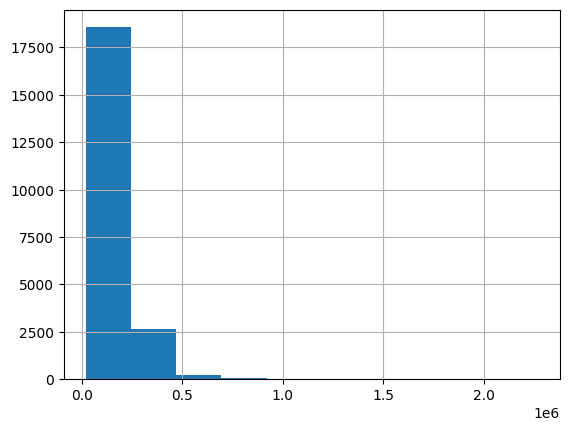

In [40]:
 df['total_income'].hist() # построение гистограммы для столбца 'total_income'

Максимальное значение графы достигает 2 млн. руб. Из за чего шкала имеет большие деления и основная масса заемщиков сгруппирована в диапазоне заработка до 200 000руб. 

#### Проверка значений в столбце 'purpose' <a id='step_2.2_purpose'></a>

Посмотрим на какие цели берут кредит заемщики, применив метод `value_counts()` к столбцу `'purpose'`.

In [41]:
df['purpose'].value_counts() # просмотр уникальных значений в столбце 'purpose'

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Вероятно в данном столбце значения заносились вручную, поэтому кредит на одну и ту же цель может иметь несколько вариантов написания. Выбор цели кредита из справочника сделал бы данные более "чистыми". Для ответа на впорос о влиянии целей кредита на закрытие в срок, понадобится дополнительная категоризация, которая структурирует этот разрозненный набор данных.

### Шаг 2.3. Изменение типов данных <a id='step_2.3'></a>

В предыдущих шагах мы вносили измения в данные. Вызовем еще раз метод `info()`, чтобы посмотреть какие типы данных содержатся в таблице сейчас.

In [42]:
 df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  float64
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


Столбцы `'days_employed'`, `'dob_years'` и `'total_income'`содержат тип данных `float64`. Для удобства расчетов изменим  тип данных в этих столбцах на `int64`.

In [43]:
df['total_income'] = df['total_income'].astype('int') # изменение типа данных в столбце 'total_income'

In [44]:
df['days_employed'] = df['days_employed'].astype('int')  # изменение типа данных в столбце 'days_employed'

In [45]:
df['dob_years'] = df['dob_years'].astype('int')  # изменение типа данных в столбце 'dob_years'

In [46]:
df.info() # получение общей информации о данных в таблице df для проверки внесенных изменений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


В таблице не осталось данных типа `float64`.

### Шаг 2.4. Удаление дубликатов <a id='step_2.4'></a>

Вычислим сколько явных дубликатов содержит таблица, используя методы `duplicated()` и `sum()`.

In [47]:
df.duplicated().sum() # проверка на отсутствие явных дубликатов

72

Вызовем метод `drop_duplicates()`, который удалит явные дубликаты, а метод `reset_index()` со значением `drop=True` удалит старые индексы и сформирует новые.

In [48]:
df = df.drop_duplicates().reset_index(drop=True) # удаление явных дубликатов (с удалением старых индексов и формированием новых)

Еще раз посчитаем явные дубликаты, чтобы убедиться, что в таблице их не осталось.

In [49]:
df.duplicated().sum() # проверка на отсутствие дубликатов

0

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма <a id='step_2.5'></a>

#### Создание нового датафрейма education_dict  

Создадим датафрейм `education_dict` и передадим ему столбцы `'education_id'` и `'education'` из основной таблицы `df`. Методом `drop_duplicates()` удалим дубликаты и выведем полученную таблицу на экран.

In [50]:
education_dict = df[['education_id', 'education']] # создание нового датафрейма education_dict 
education_dict = education_dict.drop_duplicates().reset_index(drop=True) # удаление дубликатов  (с удалением старых 
                                                                         # индексов и формированием новых)
education_dict # вывод на экран

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


#### Создание нового датафрейма family_status_dict

По аналогии с предыдущим, создадим датафрейм `family_status_dict`.

In [51]:
family_status_dict = df[['family_status_id', 'family_status']] # создание нового датафрейма family_status_dict
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True) # удаление дубликатов  (с удалением старых
                                                                                 # индексов и формированием новых)
family_status_dict # вывод на экран

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


#### Декомпозиция исходного датафрейма. ¶

Теперь удалим столбцы `'education'` и `'family_status'` из основной таблицы, используя ключевое слово `del`.

In [52]:
del df['education'] # удаление столбца 'education'

In [53]:
del df['family_status'] # удаление столбца 'family_status'

Выведем на экран первые строки таблицы, чтобы проверить результат удаления столбцов.

In [54]:
df.head() # вывод первых строк df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,2194,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Шаг 2.6. Категоризация дохода <a id='step_2.6'></a>

Создадим функцию, которая позволит распределить заемщиков на категории в зависимости от размера ежемесяного догода. Передадим функции `total_income_category` следующие категории:
* 0 - 100000 - 'C';
* 100001 - 200000 - 'B';
* 200001 и выше - 'A'.

(*В условиях проекта предлагается разделить заемщиков на пять категорий. Однако, при таком делении, в категории A, D и E попадает намного меньше клиентов, чем в категории B и C.*)


In [55]:
 def total_income_category(income): # функция для категоризации дохода, присваивает категорию в зависимости от размера дохода
        if income <= 100000:
            return 'C'
        if income <= 200000:
            return 'B'
        return 'A'

Сроздадим столбец `'total_income_category'` и сохраним в него результат примения функции `total_income_category`.

In [56]:
df['total_income_category'] = df['total_income'].apply(total_income_category) # применение функции и сохранение результата 
                                                                              # в столбец 'total_income_category' 

Проверим результат работы функции. Для этого выведем на экран последние пять строк таблицы. 

In [57]:
df.tail() # просмотр последних строк df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
21448,1,4529,43,1,1,F,компаньон,0,224791,операции с жильем,A
21449,0,2194,67,1,0,F,пенсионер,0,155999,сделка с автомобилем,B
21450,1,2113,38,1,1,M,сотрудник,1,89672,недвижимость,C
21451,3,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,A
21452,2,1984,40,1,0,F,сотрудник,0,82047,на покупку автомобиля,C


### Шаг 2.7. Категоризация целей кредита <a id='step_2.7'></a>

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:
* 'операции с автомобилем';
* 'операции с недвижимостью';
* 'проведение свадьбы';
* 'получение образования'.

In [58]:
def purpose_category(purpose): # создание функции для категоризации целей кредита
    if 'автомоб'in purpose:
        return 'операции с автомобилем'
    if 'недвиж' in purpose:
        return 'операции с недвижимостью'
    if  'жиль' in purpose:
        return 'операции с недвижимостью'
    if 'свадьб' in purpose:
        return 'проведение свадьбы'
    if 'образован' in purpose:
        return 'получение образования'

Создадим столбец `'purpose_category'` и сохраним в него результат применения функции `'purpose_category'`.

In [59]:
df['purpose_category'] = df['purpose'].apply(purpose_category) # применение функции purpose_category и сохранение результата 
                                                               # в столбец 'purpose_category'

Убедимся, что функция сработала верно, выведем список уникальных значений столбца `'purpose_category'`.

In [60]:
df['purpose_category'].value_counts() # просмотр значений столбца 'purpose_category'

операции с недвижимостью    10811
операции с автомобилем       4306
получение образования        4013
проведение свадьбы           2323
Name: purpose_category, dtype: int64

In [61]:
df.tail() # просмотр последних строк df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
21448,1,4529,43,1,1,F,компаньон,0,224791,операции с жильем,A,операции с недвижимостью
21449,0,2194,67,1,0,F,пенсионер,0,155999,сделка с автомобилем,B,операции с автомобилем
21450,1,2113,38,1,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21451,3,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,A,операции с автомобилем
21452,2,1984,40,1,0,F,сотрудник,0,82047,на покупку автомобиля,C,операции с автомобилем


### Шаг 2.8 Категоризация в зависимости от количества детей <a id='step_2.8'></a>

Для ответа на первый вопрос, о влиянии количества детей на своевременное закрытие кредита, создадим функцию `children_category`, которая разделит заемщиков на три категории в зависимости от количества детей в семье:
* нет детей - категория 'без детей';
* от 1 до 3х детей - 'с детьми';
* более трех детей - 'многодетные'.

In [62]:
def children_category(children): # функция для категоризации заемщиков в зависимости от количества детей
    if children == 0:
        return 'без детей'
    if children >=3:
        return 'многодетные'
    return 'с детьми'

Применим функцию `children_category` к столбцу `'children'` и сохраним результат в столбце `'children_category'`.

In [63]:
df['children_category'] = df['children'].apply(children_category) # создание нового столбца для категоризации 
                                                                  # по кол-ву детей у заемщика

Проверим результат работы функции.

In [64]:
df.head() # просмотр первых строк датафрейма

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,children_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,A,операции с недвижимостью,с детьми
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,B,операции с автомобилем,с детьми
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,B,операции с недвижимостью,без детей
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,A,получение образования,многодетные
4,0,2194,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,B,проведение свадьбы,без детей


In [65]:
df['children_category'].value_counts() # просмотр уникальных значений столбца 'children_category'

без детей      14090
с детьми        6983
многодетные      380
Name: children_category, dtype: int64

###  Шаг 2.9 Категоризация в зависимости от семейного положения <a id='step_2.9'></a>

В таблице заемщики разбиты на пять категорий в зависимости от семейного статуса. Однако, некоторые категории содержат слишком мало значений. Создадим новые категории: заемщики состоящие в официальном браке попадут в категорию `"состоит в браке"`, все остальные в категорию `"не состоит в браке"`. Создадим функция `family_status_categ`, которая разделит заемщиков на эти категории.

In [66]:
def family_status_categ(family_status_id): # функция для категоризации заемщиков в зависимости от количества детей
    if family_status_id == 0:
        return 'состоит в браке'
    return 'не состоит в браке'

Применим функцию `family_status_categ` к столбцу `'family_status_id'`, результат применения функции сохраним в новый столбец  `'family_status_categ'`. Убедимся что функция сработала верно: выведем на экран последние строки таблицы, а также промотрим уникальные значения столбца, используя метод `value_counts()`.

In [67]:
df['family_status_categ'] = df['family_status_id'].apply(family_status_categ) # применение функции и сохранение
                                                                              # результата в столбец 'family_status_categ'
df.tail() # вывод последних строк таблицы

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,children_category,family_status_categ
21448,1,4529,43,1,1,F,компаньон,0,224791,операции с жильем,A,операции с недвижимостью,с детьми,не состоит в браке
21449,0,2194,67,1,0,F,пенсионер,0,155999,сделка с автомобилем,B,операции с автомобилем,без детей,состоит в браке
21450,1,2113,38,1,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью,с детьми,не состоит в браке
21451,3,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,A,операции с автомобилем,многодетные,состоит в браке
21452,2,1984,40,1,0,F,сотрудник,0,82047,на покупку автомобиля,C,операции с автомобилем,с детьми,состоит в браке


In [68]:
df['family_status_categ'].value_counts() # просмотр уникальных значений столбца 'family_status_categ'

состоит в браке       12339
не состоит в браке     9114
Name: family_status_categ, dtype: int64

### Ответы на вопросы. <a id='answers'></a>

##### Вопрос 1: <a id='question_1'></a>

**Есть ли зависимость между количеством детей и возвратом кредита в срок?**

Для ответа на этот вопрос построим сводную таблицу методом `pivot_table()`.
В таблице данные будут сгруппированы по количеству детей, для каждой группы подсчитаем количество случаев просрочки и своевременного закрытия кредита.

В новом столбце `'ratio'` рассчитаем какой процент от общего числа кредитов занимают просроченные кредиты. 

In [69]:
data_pivot_ch = df.pivot_table(index='children', columns='debt', values='income_type', aggfunc='count') # создание сводной таблицы

data_pivot_ch['ratio'] = data_pivot_ch[1] / (data_pivot_ch[1] + data_pivot_ch[0]) * 100 # добавление нового столбца 'ratio'

data_pivot_ch = data_pivot_ch.fillna(0) # избавление от пропусков
data_pivot_ch.sort_values(by='ratio') #вывод на экран сводной таблицы отсортированной по столбцу 'ratio' в порядке возрастания

debt,0,1,ratio
children,,,
5,9.0,0.0,0.000000
0,13027.0,1063.0,7.544358
3,303.0,27.0,8.181818
1,4410.0,445.0,9.165808
2,1926.0,202.0,9.492481
4,37.0,4.0,9.756098


 Исследование показало, что среди заемщиков, имеющих по 5 детей нет просрочек по кредитам. Однако, это самая малочисленная группа - всего 9 человек. У клиентов, не имеющих детей, процент просрочки - 7,54%. Это на 2,22% меньше, чем у группы с самым высоким процентом просрочки (4 ребенка в семье). 

В [шаге 2.8](#step_2.8) мы разделили заемщиков на новые три категории, в зависимости от количества детей, теперь проследим зависимость на укрупненных данных.

Сгруппируем таблицу `df` по столбцу `'children_category'`, после чего посчитаем среднее арифметическое столбца `'debt'`.

In [70]:
df.groupby(['children_category'])['debt'].mean() # группировка в зависимости от количества детей и подсчет 
                                                 # средего арифметического по столбцу  'debt'

children_category
без детей      0.075444
многодетные    0.081579
с детьми       0.092654
Name: debt, dtype: float64

Исследование показало, что клиенты не имеющие детей, а также многодетные клиенты, просрочки по кредитам допускают реже. 

In [71]:
# создание сводной таблицы
data_pivot_ch = df.pivot_table(index='children_category', columns='debt', values='income_type', aggfunc='count')

data_pivot_ch['ratio'] = data_pivot_ch[1] / (data_pivot_ch[1] + data_pivot_ch[0]) * 100 # добавление нового столбца 'ratio'

data_pivot_ch.sort_values(by='ratio') #вывод на экран сводной таблицы отсортированной по столбцу 'ratio' в порядке возрастания

debt,0,1,ratio
children_category,,,
без детей,13027,1063,7.544358
многодетные,349,31,8.157895
с детьми,6336,647,9.265359


##### Вывод 1:   <a id='conclusion_1'></a>

Количество детей влияет на возврат кредита в срок. Клиенты не имеющие детей на `0,62%` реже допускают просрочки по кредитам чем многодетные клиенты, а также на `1,73 %` реже, чем клиенты имеющие 1-2 ребенка. Среди клиентов, имеющих по 5 детей нет случаев просрочки кредита.

##### Вопрос 2:  <a id='question_2'></a>

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Создадим сводную таблицу `'family_st'` методом `pivot_table`. Сгруппируем данные по столбцу `'family_status_id'` и рассчитаем количество случаев просрочки и своевременного закрытия кредита методом `'count'`.

In [72]:
# создание сводной таблицы по столбцу 'family_status_id'
data_pivot_family_st = df.pivot_table(index='family_status_id', columns='debt', values='income_type', aggfunc='count')
data_pivot_family_st

debt,0,1
family_status_id,,
0,11408,931
1,3762,388
2,896,63
3,1110,85
4,2536,274


Добавам столбец `'ratio'` и рассчитаем процент просрочки по кредитам для каждой группы `'family_status_id'`. Методом `merge()` добавим столбец `family_status` из словаря `family_status_dict`. После чего выведем таблицу на экран и отсортируем по столбцу `'ratio'` в порядке возрастания.

In [73]:
# добавление нового столбца 'ratio'
data_pivot_family_st['ratio'] = data_pivot_family_st[1] / (data_pivot_family_st[1] + data_pivot_family_st[0]) * 100

# добавление столбца 'family_status' из таблицы family_status_dict методом merge()
data_pivot_family_st = data_pivot_family_st.merge(family_status_dict, on='family_status_id', how='right')

data_pivot_family_st.sort_values(by='ratio') #вывод таблицы на экран и сортировка по столбцу 'ratio'


,family_status_id,0,1,ratio,family_status
2,2,896,63,6.569343,вдовец / вдова
3,3,1110,85,7.112971,в разводе
0,0,11408,931,7.545182,женат / замужем
1,1,3762,388,9.349398,гражданский брак
4,4,2536,274,9.750890,Не женат / не замужем


Меньше всего просрочек по кредиту допускают клиенты из категорий `'вдовы/вдовцы'` и клиенты '`в разводе'`, доля просроченных кредитов в этих категориях составляет `6,57%` и `7.11%` соответственно.
На `3,18%` просрочка больше у заемщиков из группы не `'женат/не замужем'`, и составляет `9.75%`.

В [шаге 2.9](#step_2.9) мы разбили клиентов на две категории, в зависимости от того, состоит ли клиент в официальном браке или нет. Построим сводную таблицу на основе столбца `'family_status_categ'`  и рассчитаем процент просрочки для этих двух категорий.

In [74]:
# создание сводной таблицы по столбцу 'family_status_categ'
data_pivot_family_ctg = df.pivot_table(index='family_status_categ', columns='debt', values='income_type', aggfunc='count')

# добавление нового столбца 'ratio'
data_pivot_family_ctg['ratio'] = data_pivot_family_ctg[1] / (data_pivot_family_ctg[1] + data_pivot_family_ctg[0]) * 100

data_pivot_family_ctg.sort_values(by='ratio') #вывод таблицы на экран и сортировка по столбцу 'ratio'

debt,0,1,ratio
family_status_categ,,,
состоит в браке,11408,931,7.545182
не состоит в браке,8304,810,8.887426


После группировки стало очевидно, что разница в просрочке кредита между клиентами состоящими в браке, и не состоящими в браке незначительна и составляет `1.34%`.

##### Вывод 2:  <a id='conclusion_2'></a>

Семейный статус влияет на возврат кредита в срок: клиенты из категории `'не женат/ не замужем'` на `3,18%` чаще совершают просрочки, чем клиенты из категории `'вдовец/вдова'`. Однако, если рассматривать клиентов с точки зрения того, состоят ли они в официальном браке или нет, то разница становится не такой существенной - всего `1,34%`. 

##### Вопрос 3:  <a id='question_3'></a>

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Построим сводную таблицу по столбцу `'total_income_category'`, как и в прошлых шагах добавим столбец `'ratio'` и рассчитаем процент просрочки. После чего выведем таблицу на экран и отсортируем по возрастанию столбца `'ratio'`.

In [75]:
# создание сводной таблицы по столбцу 'family_status_categ'
data_pivot_incom = df.pivot_table(index='total_income_category', columns='debt', values='income_type', aggfunc='count')

# добавление нового столбца 'ratio'
data_pivot_incom['ratio'] = data_pivot_incom[1] / (data_pivot_incom[1] + data_pivot_incom[0]) * 100 

data_pivot_incom.sort_values(by='ratio') #вывод таблицы на экран и сортировка по столбцу 'ratio'

debt,0,1,ratio
total_income_category,,,
A,4708,358,7.066719
C,4109,354,7.931884
B,10895,1029,8.629654


Исследование показало, что меньше всего просрочек допускают клиенты с самым высоким уровнем дохода - более 200тр. (категория `А`), процент просрочек в этой группе составляет `7.07%`. На `0,86%` больше просрочек допускают клиенты с доходом менее 100тр.(категория `С`) и на `1.56%` - клиенты с доходом от 101тр. до 200тр. (категория `В`).

##### Вывод 3:  <a id='conclusion_3'></a>

Результаты исследования не позволяют однозначно ответить на вопрос о том, как уровень дохода влияет на наличие просрочек по кредиту. Клиенты с самым высоким уровнем дохода допускают меньше всего просрочек - `7.07%`. Можно было бы предположить, что чем выше уровень дохода, тем меньше клиенты допускают просрочки. Однако, больше всего просрочек допустили клиенты из средней группы по уровню дохода - `8.63%`.

##### Вопрос 4:  <a id='question_4'></a>

**Как разные цели кредита влияют на его возврат в срок?**

Рассчитаем процент просрочки в зависимости от целей кредита. Построим сводную таблицу по столбцу `'purpose_category'`.

In [76]:
# создание сводной таблицы по столбцу 'purpose_category'
data_pivot_purpose = df.pivot_table(index='purpose_category', columns='debt', values='income_type', aggfunc='count')

# добавление нового столбца 'ratio'
data_pivot_purpose['ratio'] = data_pivot_purpose[1]/(data_pivot_purpose[1]+data_pivot_purpose[0])*100 

data_pivot_purpose.sort_values(by='ratio') # вывод таблицы на экран и сортировка по столбцу 'ratio'

debt,0,1,ratio
purpose_category,,,
операции с недвижимостью,10029,782,7.233373
проведение свадьбы,2137,186,8.006888
получение образования,3643,370,9.220035
операции с автомобилем,3903,403,9.359034


Больше всего просрочек клиенты докпускают по автокредитам - `9.36%`, и по кредитам на образование - `9.22%`. По кредитам на покупку недвижимости просрочка составляет `7.23%` от общего числа кредитов.

##### Вывод 4:   <a id='conclusion_4'></a>

Реже всего клиенты допускают просрочку по кредитам на недвижимость: на `2.13%` реже, чем при покупке автомобиля.

## Общий вывод:  <a id='conclusion'></a>

В ходе исследования, на основе статистике о платёжеспособности клиентов, мы проверяли влияние разных факторов на факт погашения кредита в срок.
Перед тем как приступить к исследованию была произведена предобработка данных:
* убраны пропуски;
* убраны/заменены дубликаты;
* устранены ошибки и аномалии в данных.  

Для ответа на гипотезы данные были дополнительно категоризированны по разным признакам. 

В ходе исследования мы искали ответы на четыре вопроса и установили:
1. Количество детей влияет на возврат кредита в срок. Клиенты, не имеющие детей на 1,73 % реже допускают просрочки по кредитам, чем клиенты имеющие 1-2 ребенка. Среди заемщиков в выборке, имеющих по 5 детей не зафиксировано ни одного  случая просрочки кредита.
2. Семейный статус влияет на возврат кредита в срок: клиенты из категории 'не женат/ не замужем' на 3,18% чаще совершают просрочки, чем клиенты из категории 'вдовец/вдова'. Однако, если рассматривать клиентов с точки зрения того, состоят ли они в официальном браке или нет, то разница становится не такой существенной - всего 1,34%.
3. Результаты исследования не позволяют однозначно ответить на вопрос о том, как уровень дохода влияет на наличие просрочек по кредиту. Больше всего просрочек допустили клиенты из средней группы по уровню дохода.
4. Цели кредита влияют на закрытие кредита в срок. Реже всего заемщики допускают просрочку по  кредитам на покупку недвижимости. По автокредитам случаев просрочки на 2.13% больше.